In [84]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

**Data Overview**

This json file from kaggle contains lists of json objects with data on individuals including:
- customer_id
- age
- gender
- annual_income (k$)
- spending_score (1-100)

Converted from csv to json using: https://csvjson.com/csv2json

In [85]:
df = pd.read_json('mall_customers.json')

In [86]:
df.head()

,Age,Annual_Income,CustomerID,Gender,Spending_Score
0,19,15,1,Male,39
1,21,15,2,Male,81
2,20,16,3,Female,6
3,23,16,4,Female,77
4,31,17,5,Female,40


In [87]:
average_income = df['Annual_Income'].mean()

In [88]:
average_income

60.56

In [89]:
#Add new column for incomes above average, which will be a boolean value

df['above_average_income'] = (df['Annual_Income'] - average_income) > 0

In [90]:
#You can review just 1 or more sample of the data to see how it looks

df.sample(5)

,Age,Annual_Income,CustomerID,Gender,Spending_Score,above_average_income
51,33,42,52,Male,60,False
33,18,33,34,Male,92,False
169,32,87,170,Male,63,True
87,22,57,88,Female,55,False
112,38,64,113,Female,42,True


In [91]:
df.to_csv('mall_customers_processed.csv', index=False)

In [92]:
#Using min and max to get the range

min_income_value = df['Annual_Income'].min()

In [93]:
min_income_value

15

In [94]:
max_income_value = df['Annual_Income'].max()

In [95]:
income_range = max_income_value - min_income_value

In [96]:
income_range

122

In [97]:
#Sorting data

income = df['Annual_Income']

In [98]:
income.head()

0    15
1    15
2    16
3    16
4    17
Name: Annual_Income, dtype: int64

In [99]:
sorted_income = income.sort_values().reset_index(drop=True)

In [100]:
sorted_income.head()

0    15
1    15
2    16
3    16
4    17
Name: Annual_Income, dtype: int64

In [101]:
income_mean = income.mean()
income_mean

60.56

In [102]:
income_median = income.median()
income_median

61.5

In [103]:
#this chooses the FIRST of the mode values (otherwise it will give two options)
income_mode = income.mode().values[0]
income_mode

54

In [104]:
#visualize this data using a histogram

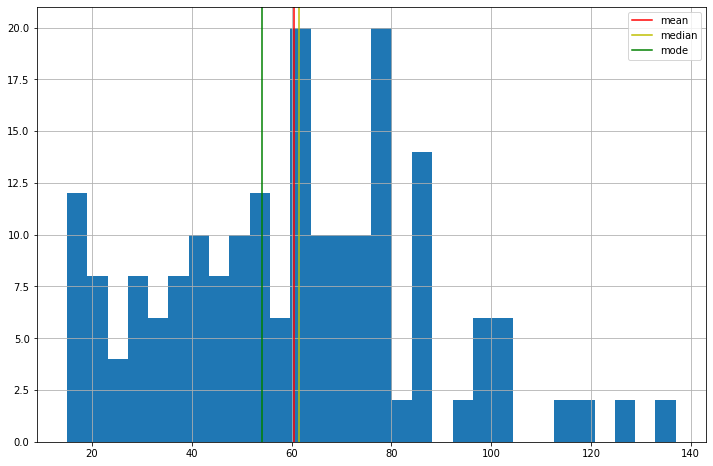

In [105]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

df['Annual_Income'].hist(bins=30)

plt.axvline(income_mean, color='r', label='mean')

plt.axvline(income_median, color='y', label='median')

plt.axvline(income_mode, color='g', label='mode')


plt.legend()

Remembers that the median is much less sensitive to outliers as compared to the mean!

**Review of Interquartile Range**:

In [106]:
print(f'Data Shape: {df.shape}')
num_records = df.shape[0]
      
print(f'Number of Records: {num_records}')

Data Shape: (200, 6)
Number of Records: 200


In [107]:
#make a copy of the income data 
income_data = df[['Annual_Income']].copy()

In [108]:
income_data.sample(3)

,Annual_Income
9,19
141,75
97,60


In [109]:
#make a copy of the age data as well
age_data = df[['Age']].copy()
age_data.sample()

,Age
141,32


In [110]:
#set up new columns for calculating cumulatives 

counts = [1] * num_records

income_data['income_counts'] = counts
age_data['age_counts'] = counts

In [111]:
#sort by ascending for the age column
age_data = age_data.sort_values('Age')
age_data.head()

,Age,age_counts
114,18,1
91,18,1
65,18,1
33,18,1
0,19,1


In [112]:
#Use the groupby function to see the cumulative counts for each age group!

age_data = age_data.groupby('Age', as_index = False).count()
age_data.head()

,Age,age_counts
0,18,4
1,19,8
2,20,5
3,21,5
4,22,3


In [113]:
#get a cumulative count of the individual counts of ages. This is used to set up the data for visualizations.

age_data['cumcount_age'] = age_data['age_counts'].cumsum()
age_data.head()

,Age,age_counts,cumcount_age
0,18,4,4
1,19,8,12
2,20,5,17
3,21,5,22
4,22,3,25


In [114]:
#Do the same for the income column! First, sort by ascending for the income column

income_data = income_data.sort_values('Annual_Income')
income_data.head()

,Annual_Income,income_counts
0,15,1
1,15,1
2,16,1
3,16,1
4,17,1


In [115]:
income_data = income_data.groupby('Annual_Income', as_index = False).count()
income_data.head()

,Annual_Income,income_counts
0,15,2
1,16,2
2,17,2
3,18,2
4,19,4


In [116]:
income_data['cumcount_income'] = income_data['income_counts'].cumsum()
income_data.head()

,Annual_Income,income_counts,cumcount_income
0,15,2,2
1,16,2,4
2,17,2,6
3,18,2,8
4,19,4,12


**Visualizing the Interquartile Range:**

- Not sensitive to outliers

In [117]:
#specify the quantile you are looking for

q1_income = df['Annual_Income'].quantile(.25)
print(f'The 25th Percentile: {q1_income}')

q3_income = df['Annual_Income'].quantile(.75)
print(f'The 75th Percentile: {q3_income}')

The 25th Percentile: 41.5
The 75th Percentile: 78.0


In [118]:
iqr_income = q3_income - q1_income
print(f'Interquartile Range: {iqr_income}')

Interquartile Range: 36.5


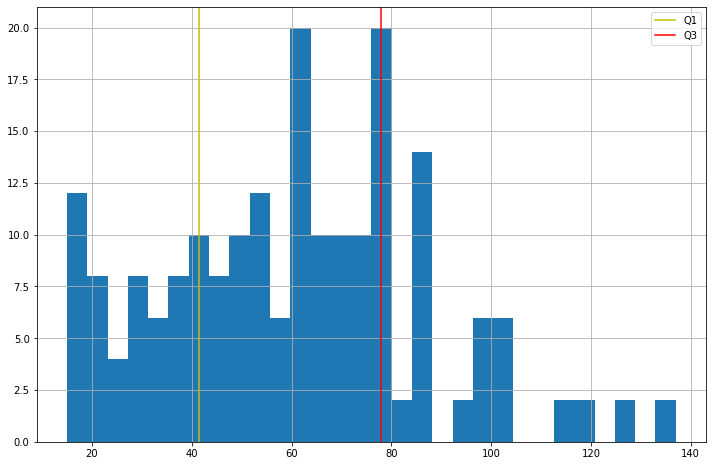

In [119]:
#Create a visualization

plt.figure(figsize=(12,8))

df['Annual_Income'].hist(bins=30)

plt.axvline(q1_income, color = 'y', label= 'Q1')
plt.axvline(q3_income, color ='r', label = 'Q3')

plt.legend()

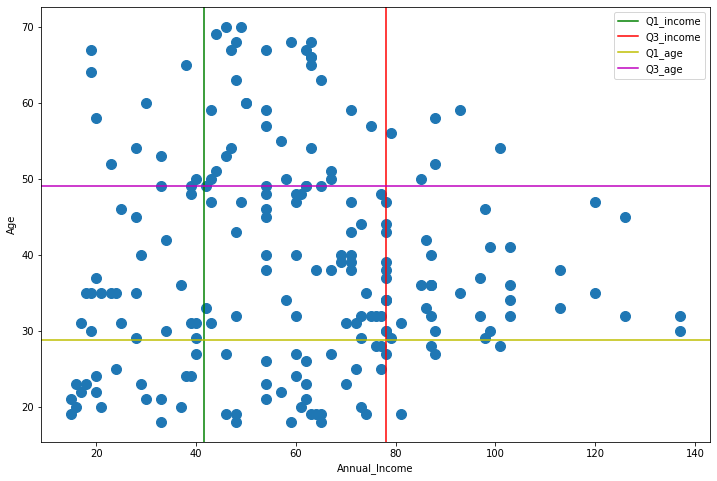

In [120]:
#as a scatterplot, with income on the X axis and Age on the Y axis with the interquartile ranges

plt.figure(figsize=(12,8))

plt.scatter(df['Annual_Income'], df['Age'], s=100)

plt.axvline(df['Annual_Income'].quantile(.25), color = 'g', label= 'Q1_income')
plt.axvline(df['Annual_Income'].quantile(.75), color ='r', label = 'Q3_income')

plt.axhline(df['Age'].quantile(.25), color = 'y', label= 'Q1_age')
plt.axhline(df['Age'].quantile(.75), color ='m', label = 'Q3_age')

plt.xlabel('Annual_Income')
plt.ylabel('Age')

plt.legend()

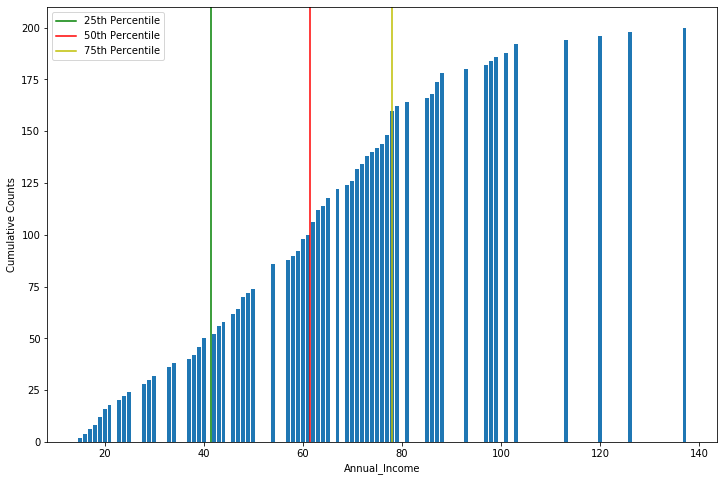

In [121]:
#We can also visualize it using a bargraph and the cumulative values from earlier:

plt.figure(figsize=(12,8))

plt.bar(income_data['Annual_Income'], income_data['cumcount_income'])

plt.axvline(df['Annual_Income'].quantile(.25), color = 'g', label= '25th Percentile')
plt.axvline(df['Annual_Income'].quantile(.50), color ='r', label = '50th Percentile')
plt.axvline(df['Annual_Income'].quantile(.75), color ='y', label = '75th Percentile')

plt.xlabel('Annual_Income')
plt.ylabel('Cumulative Counts')

plt.legend()

**Visualizing Variance and Standard Deviation:**

In [122]:
income_variance = df['Annual_Income'].var()
income_variance

689.8355778894478

In [123]:
#calculate standard deviation:

income_std = df['Annual_Income'].std()
income_std

26.264721165271254

**Statistical Vis with Seaborn**

<function matplotlib.pyplot.show(*args, **kw)>

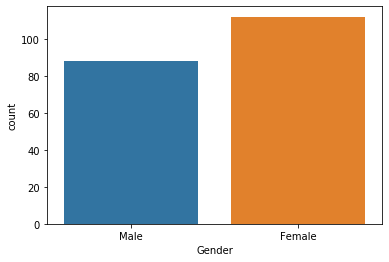

In [124]:
#A countplot shows just the total count of a column!

sns.countplot(df['Gender'])
plt.show

<Figure size 864x576 with 0 Axes>

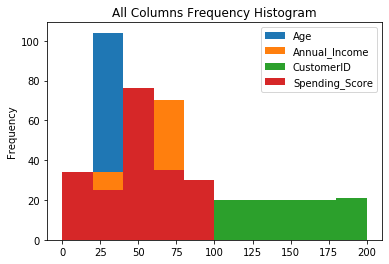

In [125]:
#Here's a quick viz of the distribution of all the columns

plt.figure(figsize=(12,8))

df.plot(kind='hist', title = 'All Columns Frequency Histogram')

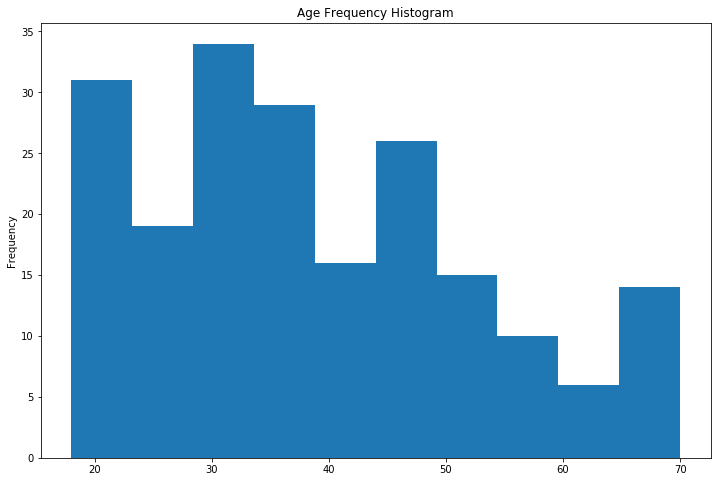

In [126]:
#Or just a quick data viz of a single column

ages = df['Age']

plt.figure(figsize=(12,8))

ages.plot(kind='hist', title = 'Age Frequency Histogram')

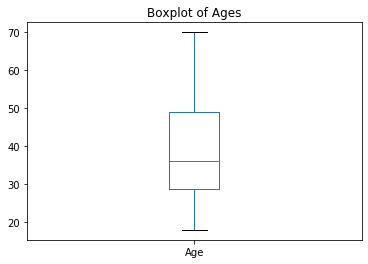

In [127]:
#Review summary statistics for a single column using a box plot
#Central line is the median (35)
#Box is the interquartile range
#There are no outliers in this plot

ages.plot(kind='box', title ='Boxplot of Ages')

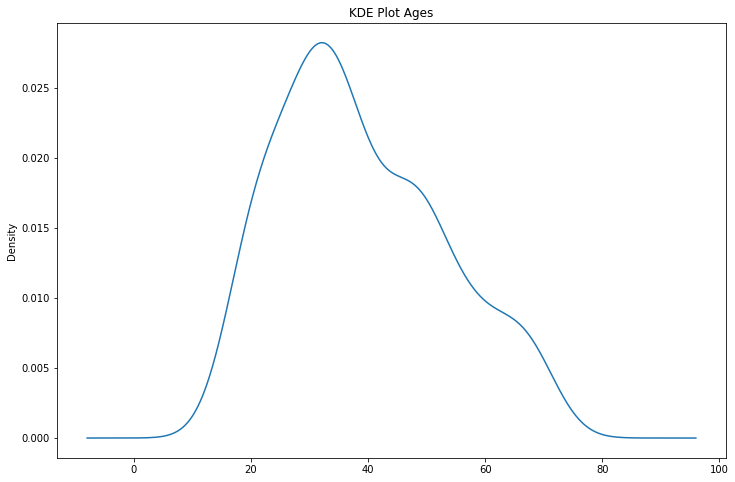

In [128]:
#review a probability distribution using a kde plot
#Kernal Density Estimation smoothes out your distribution

ages.plot(kind ='kde', 
          title = 'KDE Plot Ages', 
          figsize = (12,8))

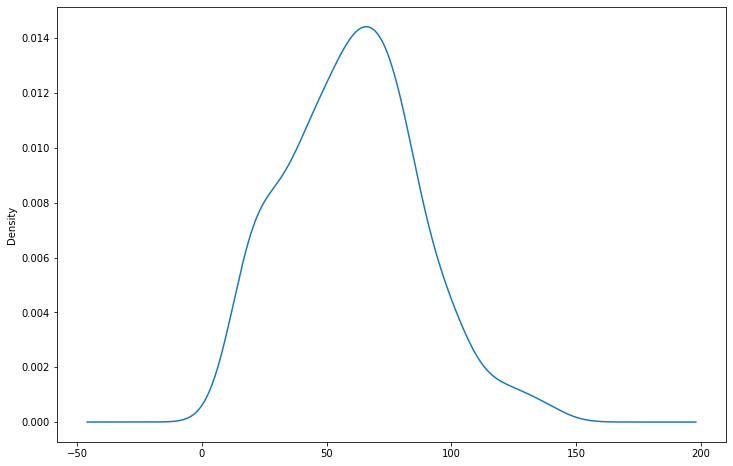

In [129]:
#Reviwe a kde of the incomes data as well

incomes = df['Annual_Income']

incomes.plot(kind='kde',
            figsize=(12,8))

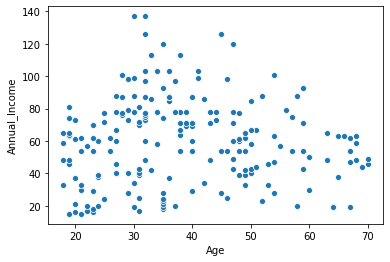

In [130]:
#Scatter plot of the two will show a linear relationship if one exists
#x and y can just correspond to the column names

sns.scatterplot(x ='Age', y='Annual_Income', data=df)

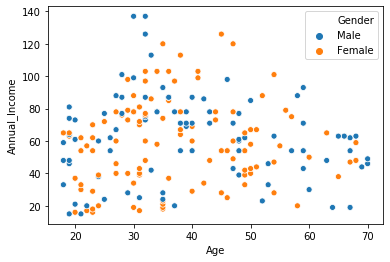

In [131]:
#review the same relationship but with gender

sns.scatterplot(x ='Age', y='Annual_Income', hue = 'Gender', data=df)

In [132]:
#You can also review this by looking at the groupby:

gender_groups = df.groupby('Gender', as_index=False)

gender_groups.head()

,Age,Annual_Income,CustomerID,Gender,Spending_Score,above_average_income
0,19,15,1,Male,39,False
1,21,15,2,Male,81,False
2,20,16,3,Female,6,False
3,23,16,4,Female,77,False
4,31,17,5,Female,40,False
5,22,17,6,Female,76,False
6,35,18,7,Female,6,False
8,64,19,9,Male,3,False
10,67,19,11,Male,14,False
14,37,20,15,Male,13,False


In [133]:
#You can also get summary statistics on the groupings using the describe function on that new df
#Here, the (.T) is a formatting description to create a horizontal tab space between to strings/characters.
#Here, men are column 0 and women are column 1

gender_groups.describe().T

0           1
Age            count  112.000000   88.000000
               mean    38.098214   39.806818
               std     12.644095   15.514812
               min     18.000000   18.000000
               25%     29.000000   27.750000
               50%     35.000000   37.000000
               75%     47.500000   50.500000
               max     68.000000   70.000000
Annual_Income  count  112.000000   88.000000
               mean    59.250000   62.227273
               std     26.011952   26.638373
               min     16.000000   15.000000
               25%     39.750000   45.500000
               50%     60.000000   62.500000
               75%     77.250000   78.000000
               max    126.000000  137.000000
CustomerID     count  112.000000   88.000000
               mean    97.562500  104.238636
               std     58.276412   57.483830
               min      3.000000    1.000000
               25%     46.750000   59.500000
               50%     94.500000  106.500000
               75%    148.250000  151.250000
               max    197.000000  200.000000
Spending_Score count  112.000000   88.000000
               mean    51.526786   48.511364
               std     24.114950   27.896770
               min      5.000000    1.000000
               25%     35.000000   24.500000
               50%     50.000000   50.000000
               75%     73.000000   70.000000
               max     99.000000   97.000000

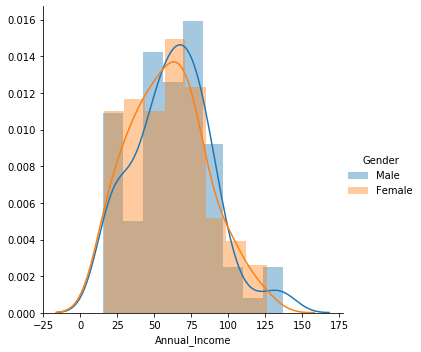

In [134]:
#Use a facet grid visualization

sns.FacetGrid(df,
             hue = 'Gender', height = 5)\
            .map(sns.distplot, 'Annual_Income')\
            .add_legend()

**Determining Skew and Kurtosis:**

- if the data is skewed, you can use log transformation to normalize the data

In [135]:
#Use the skew function. The number means 
#Remember skew is measure of asymetry around the mean
#It is positive or negative depending on which side of the mean its on

age_skew = df['Age'].skew()
print(f'Age Skew: {age_skew}')
      
income_skew = df['Annual_Income'].skew()
print(f'Income Skew: {income_skew}')

#Overall it is very tiny, so there is not really any skew in this data

Age Skew: 0.48556885096681657
Income Skew: 0.3218425498619055


In [136]:
#Use the kurtosis function to determine likelihood of extreme events
#A normal distribution has a kurtosis of 3



age_kurt = df['Age'].kurtosis()
print(f'Age kurtosis: {age_kurt}')
      
income_kurt = df['Annual_Income'].kurtosis()
print(f'Income kurtosis: {income_kurt}')

#If kurtosis is below 3, then it indicates that in this data extreme events are less likely than in a normal distribution

Age kurtosis: -0.6715728615981695
Income kurtosis: -0.09848708652696203


**Getting rid of NAN values:**


In [137]:
#here they were all question marks, but you'd replace whatever they were in your data

df = df.replace('?', np.nan)

df = df.dropna()

**Converting to Datetime:**


In [138]:
import datetime

df['birth_year'] = datetime.datetime.now().year - \
pd.to_numeric(df['Age'])

In [139]:
df.head()

,Age,Annual_Income,CustomerID,Gender,Spending_Score,above_average_income,birth_year
0,19,15,1,Male,39,False,2001
1,21,15,2,Male,81,False,1999
2,20,16,3,Female,6,False,2000
3,23,16,4,Female,77,False,1997
4,31,17,5,Female,40,False,1989


In [140]:
df.dtypes

Age                      int64
Annual_Income            int64
CustomerID               int64
Gender                  object
Spending_Score           int64
above_average_income      bool
birth_year               int64
dtype: object

**Visualizing Bivariate Relationships**

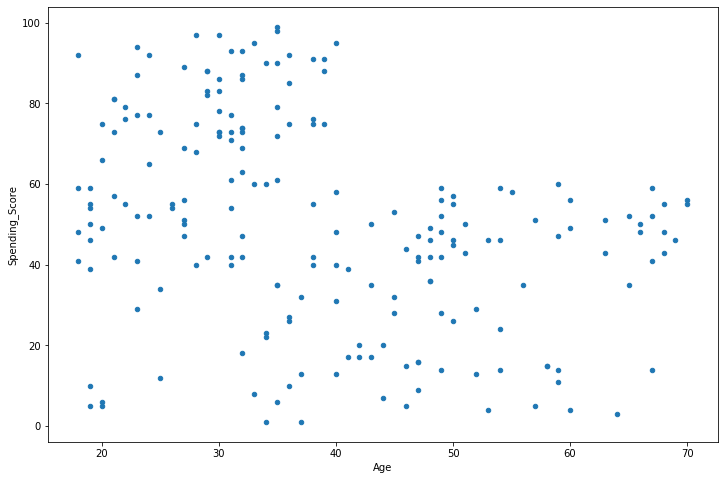

In [141]:
#If there was a linear relationship between the variables you would be able to see it here

df.plot.scatter(x='Age', y='Spending_Score', figsize=(12,8))

plt.show()

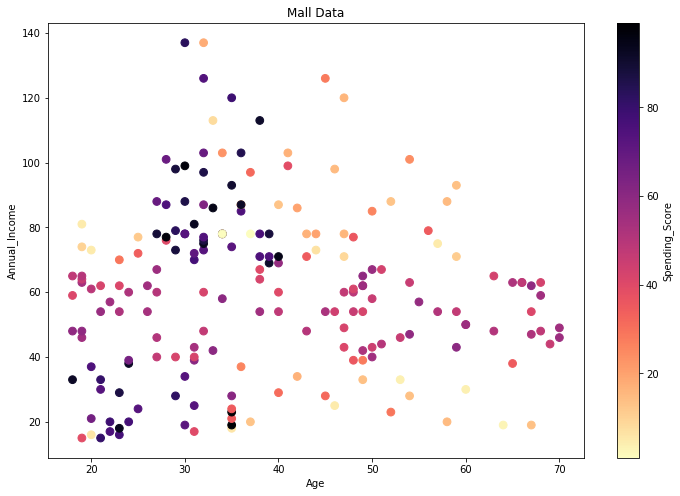

In [161]:
#review with subplots
#the 's' is scalar or array shape
#the 'c' needs to be a numeric value

fig, ax = plt.subplots()

df.plot(x = 'Age', y = 'Annual_Income',
       kind = 'scatter', s = 60, c='Spending_Score',
        cmap = 'magma_r', title = 'Mall Data',
        figsize = (12,8), ax=ax)

plt.show()

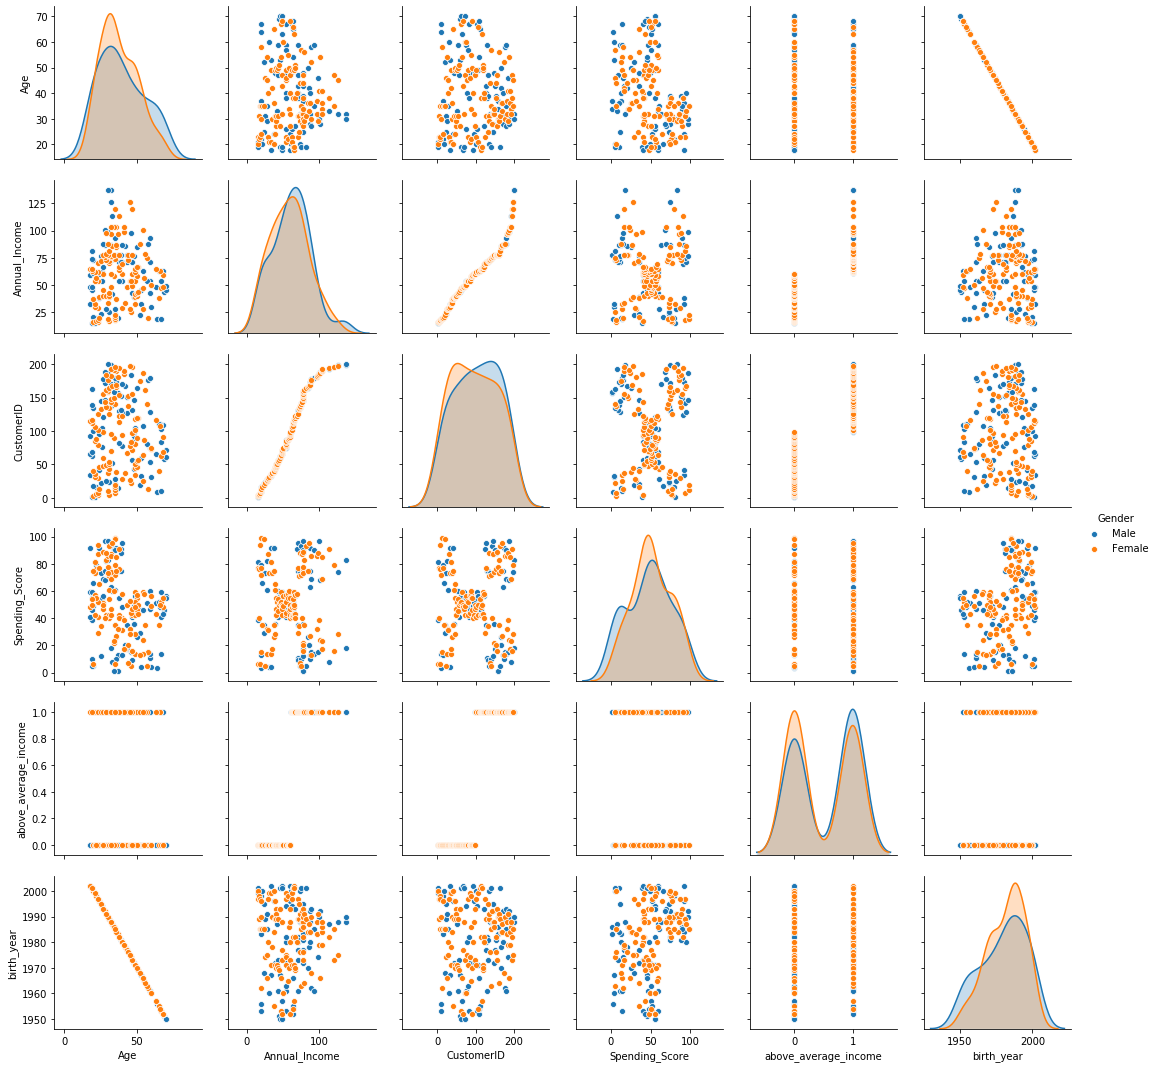

In [152]:
#Using pairplot to review gender differences in all data

sns.pairplot(df, hue = 'Gender')

